<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-JuanLeonelSantamariaMena/blob/main/Nov4/gato_no_gato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de datos

In [12]:
import glob
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
#Los datos corresponden a un subset del dataset cats vs dogs de https://www.kaggle.com/c/dogs-vs-cats
files=glob.glob('/content/drive/MyDrive/CATS_DOGS/*')

In [20]:
len(files)

1787

# Conjunto de datos de prueba

In [21]:
#numero de pixeles para nuestras imágenes.
num_px=64

In [80]:
train_x=[]
train_y=[]
i,j=0,0
for file in files[:]:
    img=Image.open(file)
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    if 'dog' in file and i<50:
        train_y.append(1)
        i +=1
        train_x.append(data)
        img.close()
    if 'cat' in file and j<50:
        train_y.append(0)
        j +=1
        train_x.append(data)
        img.close()
    if i==50 and j==50:
        print(f'50/50:{i}/{j}')
        break
        img.close()
train_y=np.asarray(train_y)
train_x=np.asarray(train_x)

50/50:50/50


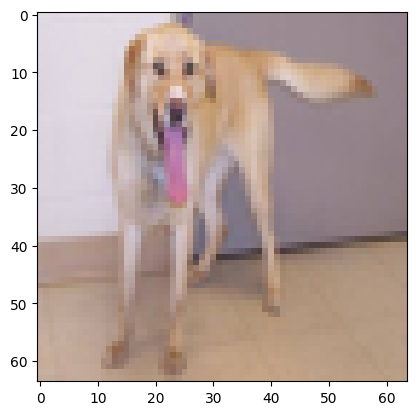

In [52]:
plt.imshow(train_x[50])

In [50]:
train_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [51]:
len(train_y)

100

#Preparamos la base

In [92]:
test_x=[]
test_y=[]
i,j=0,0
for file in files[:]:
    #print(file)
    img=Image.open(file)
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    if 'dog' in file and i<99:
        i += 1
        if i>49:
          test_y.append(1)
          test_x.append(data)
          #print(i)
        img.close()
    if 'cat' in file and j<99:
        j += 1
        if j>49:
          test_y.append(0)
          test_x.append(data)
        img.close()
    if i==100 and j==100:
        print(f'50/50:{i}/{j}')
        break
        img.close
test_y=np.asarray(test_y)
test_x=np.asarray(test_x)

In [93]:
len(test_x)

100

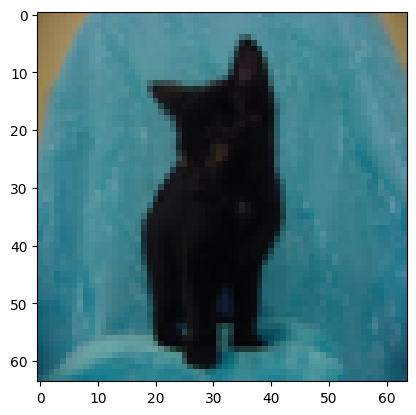

In [94]:
plt.imshow(test_x[0])

In [96]:
train_x_flatten = train_x.reshape(train_x.shape[0], -1).T

test_x_flatten = test_x.reshape(test_x.shape[0], -1).T

train_set_y=train_y.reshape((1,train_y.shape[0]))
test_set_y=test_y.reshape((1,test_y.shape[0]))

In [98]:
train_set_x= train_x_flatten/255
test_set_x= test_x_flatten/255

In [105]:
train_x_flatten.shape

(12288, 100)

$$z= \omega^T x+b$$

$$\sigma(z)=\frac{1}{1+e^{-z}}$$

In [119]:
#funcion Z
def z(x,w,b):
  return w.T @ x + b
#funcion sigma
def sigma(x,w,b,z):
  return (1/(1+np.exp(-z(x,w,b))))
#funcion costo
def J(x,y,w,b,z,sigma):
  j=0.0
  y_=sigma(x,w,b,z)
  m=len(y)
  j=np.sum(y*np.log(y_)+(1-y)*np.log(1-y_))
  j=np.squeeze
  return -j/len(y)



In [120]:
w=np.zeros(train_x_flatten.shape)
b=0.

In [ ]:
def propagate()

In [123]:
train_x_flatten.shape[1]

100

In [118]:
1/(1+np.exp(-w.T @ train_x_flatten))

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])